In [76]:
import numpy as np
from prox_tv import tv1_2d

In [58]:
d1 = 100
d2 = 40
import matplotlib.pyplot as plt

In [59]:
def compute_tv(image):
    return np.sum(np.abs(image[1:,:] - image[:-1,:])) + np.sum(np.abs(image[:,1:] - image[:,:-1]))

In [84]:
N = 10000
tv_norms = np.empty(N)
l1_norms = np.empty(N)
for n in range(N):
    im = tv1_2d(np.random.randn(d1*d2).reshape(d1,d2), w=.0025, max_iters=1)
    im = im / np.linalg.norm(im)
    tv_norms[n] = compute_tv(im)
    l1_norms[n] = np.sum(np.abs(im))

In [85]:
test_stat = l1_norms/tv_norms

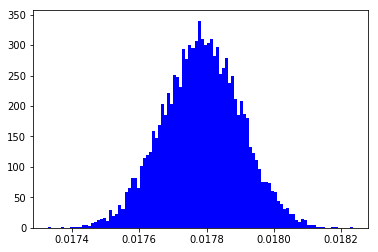

In [86]:
plt.hist(tv_norms/ ((d1*(d2-1)) + (d2*(d1-1))), bins=100, color='b')
plt.show()

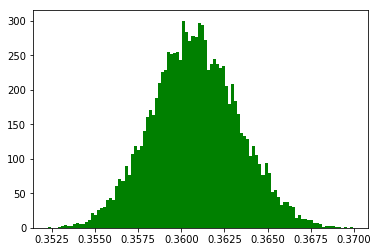

In [87]:
thresh = (d1 * d2) / ((d1*(d2-1)) + (d2*(d1-1)))
plt.hist(test_stat, bins=100,color='g')
plt.show()

In [ ]:
np.mean(test_stat) 